# <span style="color:darkblue"> QTM 151 - Quiz 5 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [1]:
# Write your answer here

print ("Aanya Vusirikala")


Aanya Vusirikala


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [2]:
# Write your answer here:

print ("I will abide by Emory's code of conduct")


I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [3]:
# Write your answer here

import pandas as pd
import matplotlib.pyplot as plt


<font size = "5">

In this quiz you will work with data on exchange rates, <br>
for the following currencies:

- 1 euro (EUR) to dollar (USD)
- 1 pound (GPB) to dollar (USD).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "currencies.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 21.


In [21]:
# Write your own code
currencies = pd.read_csv("data_raw/currencies.csv") 
currencies["date"] = pd.to_datetime(currencies["date_string"])
date1 = pd.to_datetime(currencies["date"], format = "%A %B %d %Y")


<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "gbp_to_usd" and "eur_to_usd" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 Euro to USD" and "1 GPB to USD"

Hint: See Lecture 22 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


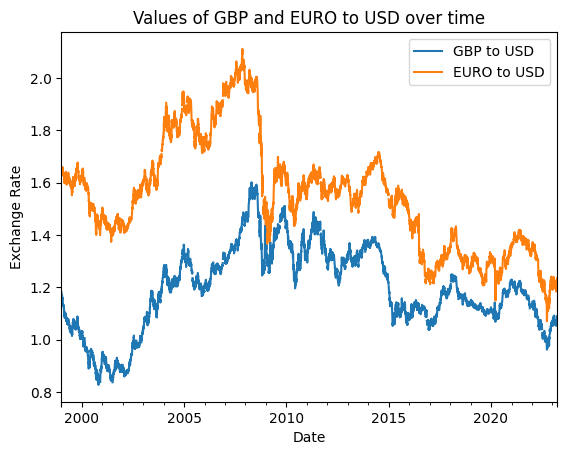

In [40]:
# Write your own code
currencies = currencies.sort_values("date",ascending = True)

currencies[["date","gbp_to_usd","eur_to_usd"]].set_index("date").plot() 
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Values of GBP and EURO to USD over time")
plt.legend(["GBP to USD","EURO to USD"])

<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_euro" which computes the percentage daily <br>
growth rate of "eur_to_usd".

Hint: Use ```.diff()``` and ```.shift(1)``` as in Lecture 22

In [26]:
# Write your own code

currencies["diff_euro"] = currencies["eur_to_usd"].diff()
currencies["lag_euro"]    = currencies["eur_to_usd"].shift(1)
currencies["growth_euro"] = currencies["diff_euro"]* 100/currencies["lag_euro"]
display (currencies[["eur_to_usd","diff_euro","lag_euro","growth_euro"]])

,eur_to_usd,diff_euro,lag_euro,growth_euro
0,1.6581,NaN,NaN,NaN
1,1.6566,-0.0015,1.6581,-0.090465
2,1.6547,-0.0019,1.6566,-0.114693
3,1.6495,-0.0052,1.6547,-0.314256
4,1.6405,-0.0090,1.6495,-0.545620
...,...,...,...,...
6320,1.2278,0.0053,1.2225,0.433538
6321,1.2341,0.0063,1.2278,0.513113
6322,1.2313,-0.0028,1.2341,-0.226886
6323,1.2368,0.0055,1.2313,0.446682


<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_euro" had a value greater than 2 or less than -2
- Generate a line plot with the "growth_euro" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 22 to create a shaded region <br>
for time periods where "bool_cond" is true.



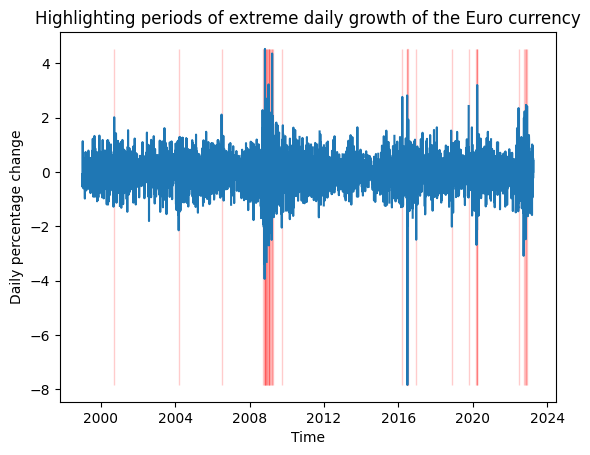

In [37]:
# Write your own code

currencies["bool_cond"] = (currencies["growth_euro"] > 2) | (currencies["growth_euro"] < -2)

# Create a line plot
plt.plot("date", "growth_euro", data = currencies)
plt.xlabel("Time")
plt.ylabel("Daily percentage change")
plt.title("Highlighting periods of extreme daily growth of the Euro currency")

# Add shaded region
vec_y = currencies["growth_euro"]
plt.fill_between(x= currencies["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = currencies["bool_cond"],
                 alpha = 0.2,color = "red")

plt.show()


<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the column "date" and freq to "m" (month)
- Follow the instructions in Lecture 21 to compute an aggregate dataset <br>
by month which computes the standard deviation of "eur_to_usd"
- Display the dataset




Text(0.5, 1.0, 'Monthly average Euro to USD exchange rate')

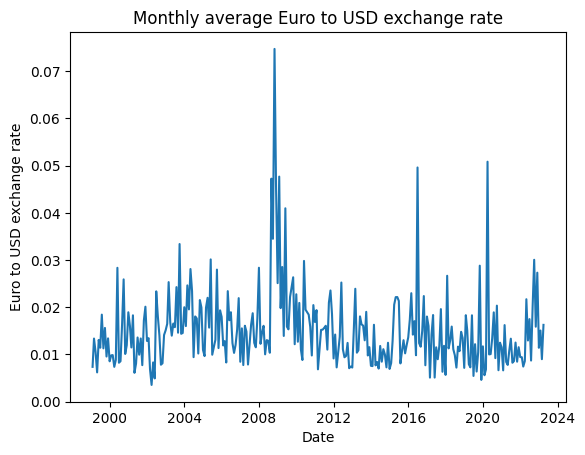

In [39]:
# Write your own code
# In "freq" specify the letter for the level of aggregation
# year (y), month (m), week (w), day(d)

month_config = pd.Grouper(key='date', freq='m')
monthlydata = (currencies
               .groupby(month_config) 
               .agg(eur_std = ("eur_to_usd","std"))
               .reset_index())

#plot aggregate data
plt.plot("date","eur_std",
          data = monthlydata.sort_values("date",ascending = True))
plt.xlabel("Date")
plt.ylabel("Euro to USD exchange rate")
plt.title("Monthly average Euro to USD exchange rate")


<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["eur_to_usd","gbp_to_usd"]
```

- Display the dataset

Hint: See Lecture 22 for details on ```pd.melt()```

In [33]:
# Write your own code


financial_long = pd.melt(currencies,
                         var_name   = "type",
                         value_name = "exchange_rate",
                         id_vars='date', 
                         value_vars=['eur_to_usd','gbp_to_usd'])

display(financial_long)

,date,type,exchange_rate
0,1999-01-04,eur_to_usd,1.6581
1,1999-01-05,eur_to_usd,1.6566
2,1999-01-06,eur_to_usd,1.6547
3,1999-01-07,eur_to_usd,1.6495
4,1999-01-08,eur_to_usd,1.6405
...,...,...,...
12645,2023-03-27,gbp_to_usd,1.0789
12646,2023-03-28,gbp_to_usd,1.0844
12647,2023-03-29,gbp_to_usd,1.0826
12648,2023-03-30,gbp_to_usd,1.0899
